In [2]:
#importing libraries
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

#importing libraries for building models
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
import statsmodels.api as sm
# for model evaluation
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
# for suppressing warnings
import warnings
warnings.filterwarnings("ignore")


In [3]:
h_data=pd.read_csv("train.csv")
h_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
h_data.shape

(1460, 81)

In [5]:
h_data.info() #for infor about each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
h_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [7]:
h_data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [8]:
#separating the numerical and categorical data
num_data=h_data.select_dtypes('number')
catg_data=h_data.select_dtypes('object')

In [9]:
num_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   MasVnrArea     1452 non-null   float64
 9   BsmtFinSF1     1460 non-null   int64  
 10  BsmtFinSF2     1460 non-null   int64  
 11  BsmtUnfSF      1460 non-null   int64  
 12  TotalBsmtSF    1460 non-null   int64  
 13  1stFlrSF       1460 non-null   int64  
 14  2ndFlrSF       1460 non-null   int64  
 15  LowQualFinSF   1460 non-null   int64  
 16  GrLivArea      1460 non-null   int64  
 17  BsmtFullBath   1460 non-null   int64  
 18  BsmtHalf

In [10]:
catg_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSZoning       1460 non-null   object
 1   Street         1460 non-null   object
 2   Alley          91 non-null     object
 3   LotShape       1460 non-null   object
 4   LandContour    1460 non-null   object
 5   Utilities      1460 non-null   object
 6   LotConfig      1460 non-null   object
 7   LandSlope      1460 non-null   object
 8   Neighborhood   1460 non-null   object
 9   Condition1     1460 non-null   object
 10  Condition2     1460 non-null   object
 11  BldgType       1460 non-null   object
 12  HouseStyle     1460 non-null   object
 13  RoofStyle      1460 non-null   object
 14  RoofMatl       1460 non-null   object
 15  Exterior1st    1460 non-null   object
 16  Exterior2nd    1460 non-null   object
 17  MasVnrType     1452 non-null   object
 18  ExterQual      1460 non-null

# Identifying and haldling extreme values assuming lower fence (Q1-1.5*IQR) and upper fence (Q3+1.5*IQR)

In [11]:
outliers_percent={}

for i in num_data.columns:
    IQR=num_data[i].quantile(.75)-num_data[i].quantile(.25)
    outliers_count=num_data[(num_data[i]>(num_data[i].quantile(.75)+1.5*IQR)) | (num_data[i]<(num_data[i].quantile(.25)-1.5*IQR))].shape[0]
    outliers_percent[i]=round(outliers_count/num_data.shape[0]*100,2) #shape[0] ref to the number of rows of num_data
    
outlier_df=pd.DataFrame({'Features':list(outliers_percent.keys()),'Percentage':list(outliers_percent.values())})
outlier_df.sort_values(by="Percentage", ascending=False)
    

,Features,Percentage
30,EnclosedPorch,14.25
10,BsmtFinSF2,11.44
5,OverallCond,8.56
32,ScreenPorch,7.95
1,MSSubClass,7.05
8,MasVnrArea,6.58
2,LotFrontage,6.03
18,BsmtHalfBath,5.62
29,OpenPorchSF,5.27
3,LotArea,4.73


# Significant %of data falling under outliers in some of the features. So reassigning values within the max and min values

In [12]:
for i,j in outliers_percent.items():
    if i!='SalePrice':
        IQR = h_data[i].quantile(.75) - h_data[i].quantile(.25) 
        max_value = h_data[i].quantile(.75)+1.5*IQR
        min_value = h_data[i].quantile(.25)-1.5*IQR
        h_data[i][h_data[i] > max_value] = max_value
        h_data[i][h_data[i] < min_value ] = min_value


In [13]:
h_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0,12.000000,2010.000000,755000.000000


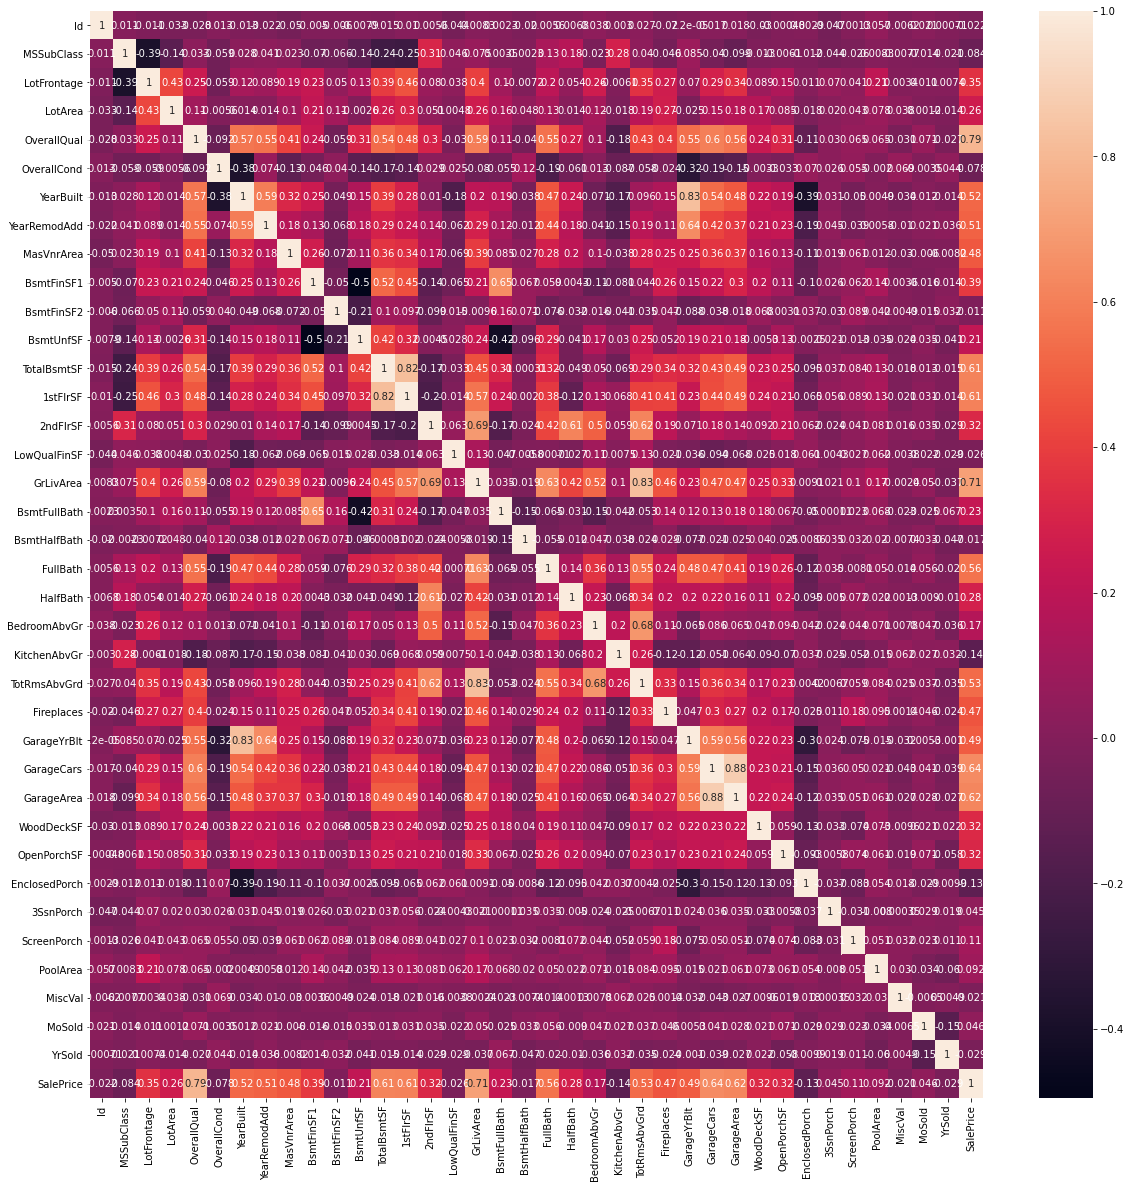

In [14]:
plt.figure(figsize=(20,20))
sns.heatmap(num_data.corr(),annot=True)
plt.show()

# Analyzing numerical features with continuous values

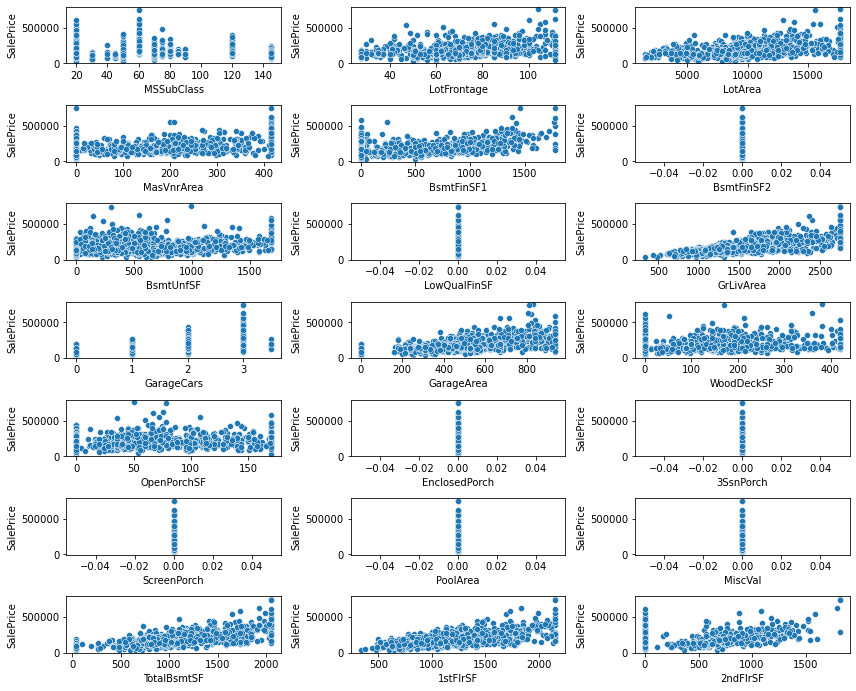

In [15]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(h_data[feature], h_data['SalePrice'])
    plt.tight_layout()

# Distribution of the numeric features

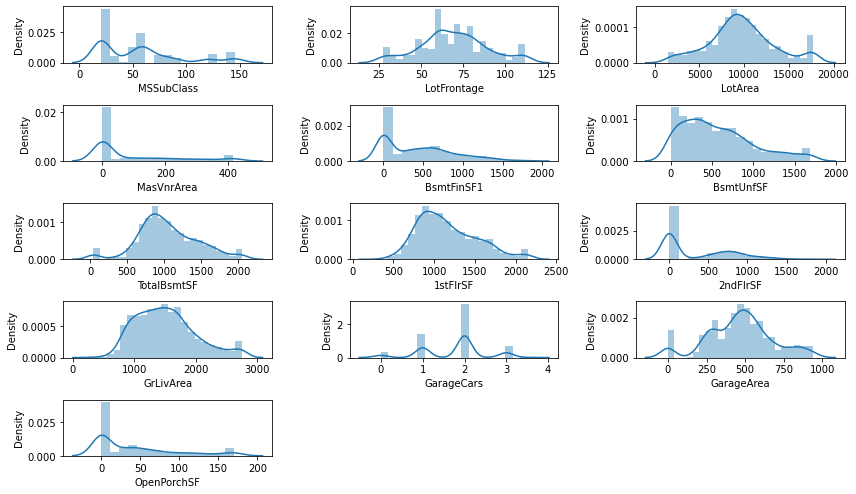

In [16]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1','BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF','GrLivArea', 'GarageCars', 'GarageArea', 'OpenPorchSF']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.distplot(h_data[feature])
    plt.tight_layout()

In [17]:
h_data[[ 'LowQualFinSF', 'GrLivArea', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']].describe()


,LowQualFinSF,GrLivArea,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
count,1460.0,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.0,1460.0,1460.0,1460.0,1460.0
mean,0.0,1503.735873,1.765411,470.670719,91.806849,42.603425,0.0,0.0,0.0,0.0,0.0
std,0.0,481.375641,0.742753,207.105729,116.658120,52.501584,0.0,0.0,0.0,0.0,0.0
min,0.0,334.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
25%,0.0,1129.500000,1.000000,334.500000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
50%,0.0,1464.000000,2.000000,480.000000,0.000000,25.000000,0.0,0.0,0.0,0.0,0.0
75%,0.0,1776.750000,2.000000,576.000000,168.000000,68.000000,0.0,0.0,0.0,0.0,0.0
max,0.0,2747.625000,3.500000,938.250000,420.000000,170.000000,0.0,0.0,0.0,0.0,0.0


In [18]:
h_data.drop(['LowQualFinSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal'], axis=1, inplace=True)

# Checking the remaining columns
h_data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF',

In [19]:
h_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   float64
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Cheking the dataframe with discrete features


In [20]:
h_data[['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']]

,OverallQual,OverallCond,MoSold,YrSold,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,YearBuilt,YearRemodAdd
0,7,5.0,2,2008,1.0,0,2,1,3.0,1,8,0.0,2003.0,2003,2003
1,6,7.5,5,2007,0.0,0,2,0,3.0,1,6,1.0,1976.0,1976,1976
2,7,5.0,9,2008,1.0,0,2,1,3.0,1,6,1.0,2001.0,2001,2002
3,7,5.0,2,2006,1.0,0,1,0,3.0,1,7,1.0,1998.0,1915,1970
4,8,5.0,12,2008,1.0,0,2,1,4.0,1,9,1.0,2000.0,2000,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,6,5.0,8,2007,0.0,0,2,1,3.0,1,7,1.0,1999.0,1999,2000
1456,6,6.0,2,2010,1.0,0,2,0,3.0,1,7,2.0,1978.0,1978,1988
1457,7,7.5,5,2010,0.0,0,2,0,4.0,1,9,2.0,1941.0,1941,2006
1458,5,6.0,4,2010,1.0,0,1,0,2.0,1,5,0.0,1950.0,1950,1996


# plotting the discrete features against the target variable (sales price)

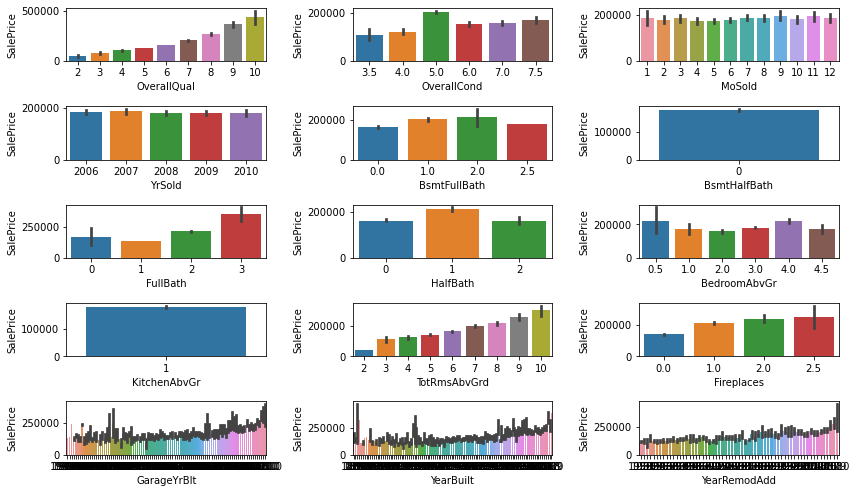

In [21]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['OverallQual','OverallCond','MoSold','YrSold','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','YearBuilt','YearRemodAdd']):
    plt.subplot(9, 3, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.barplot(h_data[feature], h_data['SalePrice'])
    plt.tight_layout()

In [22]:
h_data[['BsmtFullBath', 'KitchenAbvGr','GarageYrBlt','YearBuilt','YearRemodAdd','GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']].describe()


,BsmtFullBath,KitchenAbvGr,GarageYrBlt,YearBuilt,YearRemodAdd,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
count,1460.000000,1460.0,1379.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000
mean,0.425000,1.0,1978.506164,1971.299315,1984.865753,1978.506164,1971.299315,1984.865753,2007.815753
std,0.517373,0.0,24.689725,30.108397,20.645407,24.689725,30.108397,20.645407,1.328095
min,0.000000,1.0,1900.000000,1885.000000,1950.000000,1900.000000,1885.000000,1950.000000,2006.000000
25%,0.000000,1.0,1961.000000,1954.000000,1967.000000,1961.000000,1954.000000,1967.000000,2007.000000
50%,0.000000,1.0,1980.000000,1973.000000,1994.000000,1980.000000,1973.000000,1994.000000,2008.000000
75%,1.000000,1.0,2002.000000,2000.000000,2004.000000,2002.000000,2000.000000,2004.000000,2009.000000
max,2.500000,1.0,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000,2010.000000


In [23]:
print(h_data['BsmtFullBath'].value_counts())
print(h_data['KitchenAbvGr'].value_counts())

0.0    856
1.0    588
2.0     15
2.5      1
Name: BsmtFullBath, dtype: int64
1    1460
Name: KitchenAbvGr, dtype: int64


In [24]:
h_data.drop(['KitchenAbvGr'], axis=1, inplace=True)

In [25]:
h_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,55.085616,69.134888,9647.388014,6.100685,5.543493,1971.299315,1984.865753,90.192149,439.997517,...,6.487671,0.611301,1978.506164,1.765411,470.670719,91.806849,42.603425,6.321918,2007.815753,180921.195890
std,421.610009,37.508183,19.662022,3594.356399,1.378430,0.963696,30.108397,20.645407,134.925253,433.219435,...,1.541916,0.638959,24.689725,0.742753,207.105729,116.658120,52.501584,2.703626,1.328095,79442.502883
min,1.000000,20.000000,27.500000,1481.500000,2.000000,3.500000,1885.000000,1950.000000,0.000000,0.000000,...,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,8.000000,2009.000000,214000.000000
max,1460.000000,145.000000,111.500000,17673.500000,10.000000,7.500000,2010.000000,2010.000000,415.000000,1780.625000,...,10.000000,2.500000,2010.000000,3.500000,938.250000,420.000000,170.000000,12.000000,2010.000000,755000.000000


In [26]:
# Converting the year related features into number of years

for feature in ['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']:
    h_data[feature] = 2022 - h_data[feature]

In [27]:
h_data[['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']]

,GarageYrBlt,YearBuilt,YearRemodAdd,YrSold
0,19.0,19,19,14
1,46.0,46,46,15
2,21.0,21,20,14
3,24.0,107,52,16
4,22.0,22,22,14
...,...,...,...,...
1455,23.0,23,22,15
1456,44.0,44,34,12
1457,81.0,81,16,12
1458,72.0,72,26,12


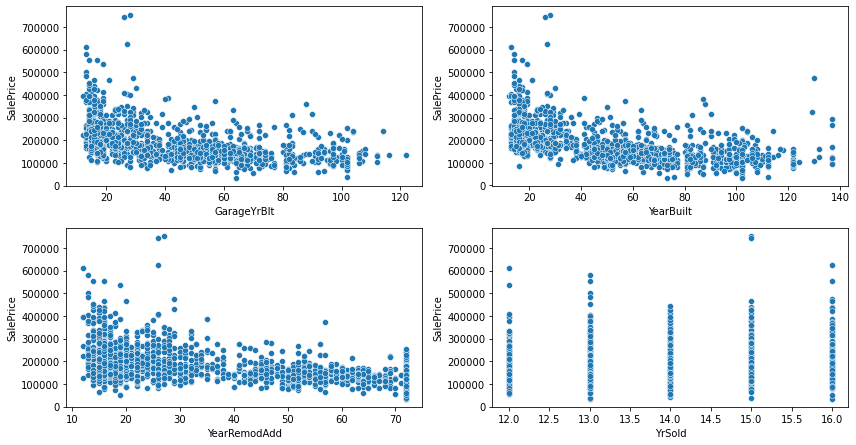

In [28]:
fig=plt.subplots(figsize=(12, 12))

for i, feature in enumerate(['GarageYrBlt','YearBuilt','YearRemodAdd', 'YrSold']):
    plt.subplot(4, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.scatterplot(h_data[feature], h_data['SalePrice'])
    plt.tight_layout()

# handling of missing values

In [29]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in h_data.select_dtypes(exclude=['object']).columns:
    if h_data[feat].isnull().any():
        print(feat, ' : ',  round(h_data[feat].isnull().sum()/h_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage  :  18.0
MasVnrArea  :  1.0
GarageYrBlt  :  6.0


In [30]:
# drop ID column and MasVnrArea columns
h_data = h_data[~h_data['MasVnrArea'].isnull()]
h_data.drop(['Id'], axis=1, inplace=True)
num_data.drop(['Id'], axis=1, inplace=True)

In [31]:
h_data.columns.shape

(73,)

In [32]:
h_data.drop(['GarageCars', 'GarageYrBlt', 'GrLivArea', 'TotalBsmtSF'], axis=1, inplace=True)

In [33]:
# Categorical Features Missing Value Handling 
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in h_data.select_dtypes(include=['object']).columns:
    if h_data[feat].isnull().any():
        print(feat, ':', round(h_data[feat].isnull().sum()/h_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
Alley : 94.0
BsmtQual : 3.0
BsmtCond : 3.0
BsmtExposure : 3.0
BsmtFinType1 : 3.0
BsmtFinType2 : 3.0
Electrical : 0.0
FireplaceQu : 47.0
GarageType : 6.0
GarageFinish : 6.0
GarageQual : 6.0
GarageCond : 6.0
PoolQC : 100.0
Fence : 81.0
MiscFeature : 96.0


In [34]:
h_data['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [35]:
# For 'Alley', Nan means 'No access to alley'
# For 'BsmtQual', 'BsmtCond', BsmtExposure, BsmtFinType1, BsmtFinType2 Nan means 'No basement'
# For GarageType, GarageFinish, GarageQual, GarageCond Nan means 'No garage'
# For 'FireplaceQu' and 'Fence' Nan means 'No Fire place' and 'No fence' respectively
# MiscFeature - Nan means no additional features mentioned.
# All these features will be imputed with meaningful values in place of missing data.

In [36]:
mv_categorical_features = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'FireplaceQu' ,'Fence' ,'MiscFeature']
print(h_data[mv_categorical_features].isnull().sum())

Alley           1362
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
FireplaceQu      686
Fence           1171
MiscFeature     1398
dtype: int64


In [37]:
# Imputing missing values with "Not_applicable"
h_data[mv_categorical_features] = h_data[mv_categorical_features].fillna(value='Not_applicable', axis=1)

# Checking after imputation
print(h_data[mv_categorical_features].isnull().sum())

Alley           0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
FireplaceQu     0
Fence           0
MiscFeature     0
dtype: int64


In [38]:
# dropping 'PoolQC' for very high percentage of missing value and highly imbalance data (if missing value is imputed)
h_data.drop(['PoolQC'], axis=1, inplace=True)

# dropping rows with null values in 'Electrical', for very low missing value count
h_data.dropna(subset=['Electrical'], inplace=True)

In [39]:
print("Feature : Percentage of Missing Value")
print("=====================================")
for feat in h_data.columns:
    if h_data[feat].isnull().any():
        print(feat, ':', round(h_data[feat].isnull().sum()/h_data.shape[0], 2)*100)

Feature : Percentage of Missing Value
LotFrontage : 18.0


# Encoding categorical variables

In [40]:
# Function to generate boxplot for SalePrice against different features given the list of features

def generate_boxplot(feature_list):
    fig=plt.subplots(figsize=(20, 16))
    for i, feature in enumerate(feature_list):
        plt.subplot(4, 2, i+1)
        plt.subplots_adjust(hspace = 2.0)
        sns.boxplot(h_data['SalePrice'], h_data[feature])
        plt.tight_layout()

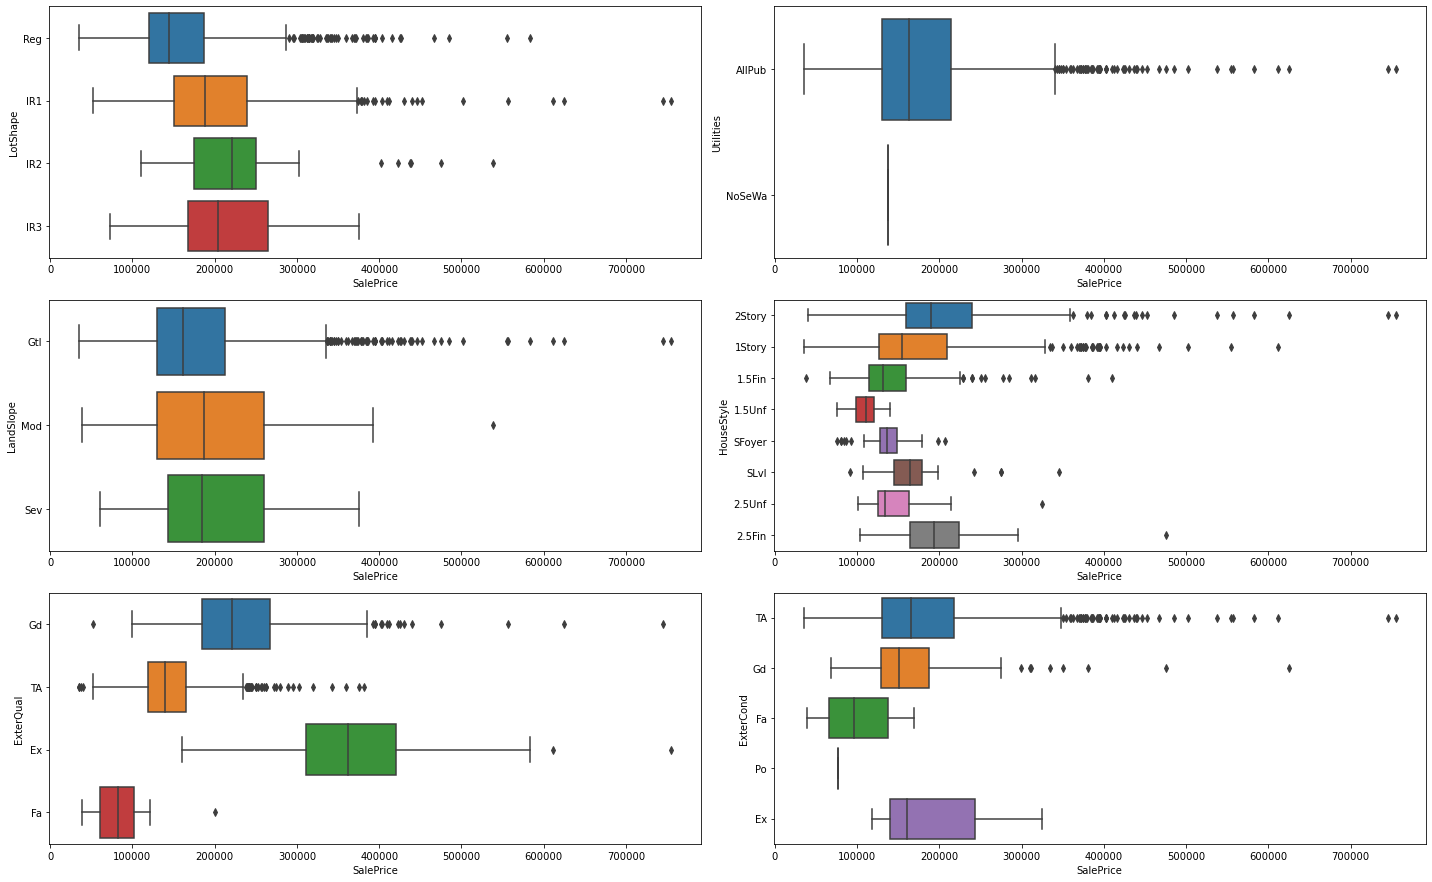

In [41]:
# Analyzing Ordered Features
ext_features = ['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond']

generate_boxplot(ext_features)

In [42]:
# 'LotShape' : Slightly irregular LotShape have the highest SalePrice
# 'Utilities' : Most of the houses in the dataset have all the public utilities
# 'LandSlope' : Houses at severe land slope have lowest SalePrice
# 'HouseStyle' : 2 storied houses have the highest SalePrice
# 'ExterQual' : Houses with Excellent quality of material on the exterior have the highest SalePrice
# 'ExterCond' : Houses with Excellent condition of material on the exterior have the highest SalePrice

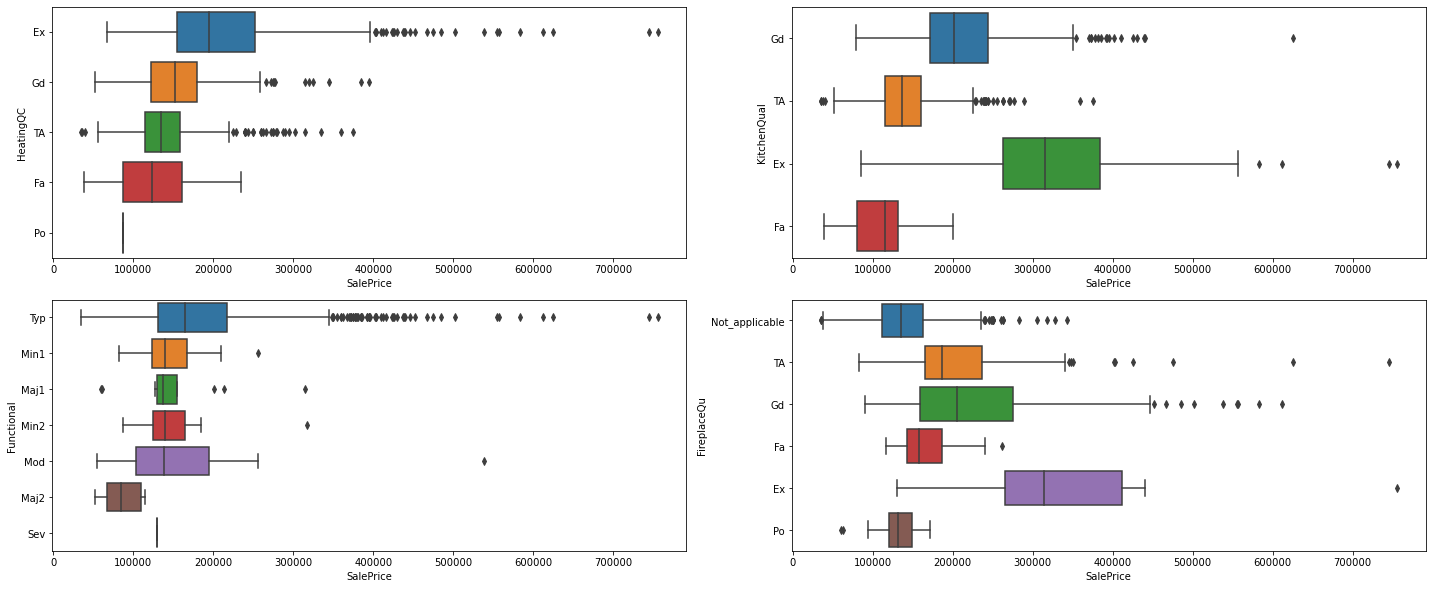

In [43]:
int_features = ['HeatingQC', 'KitchenQual','Functional','FireplaceQu']

generate_boxplot(int_features)

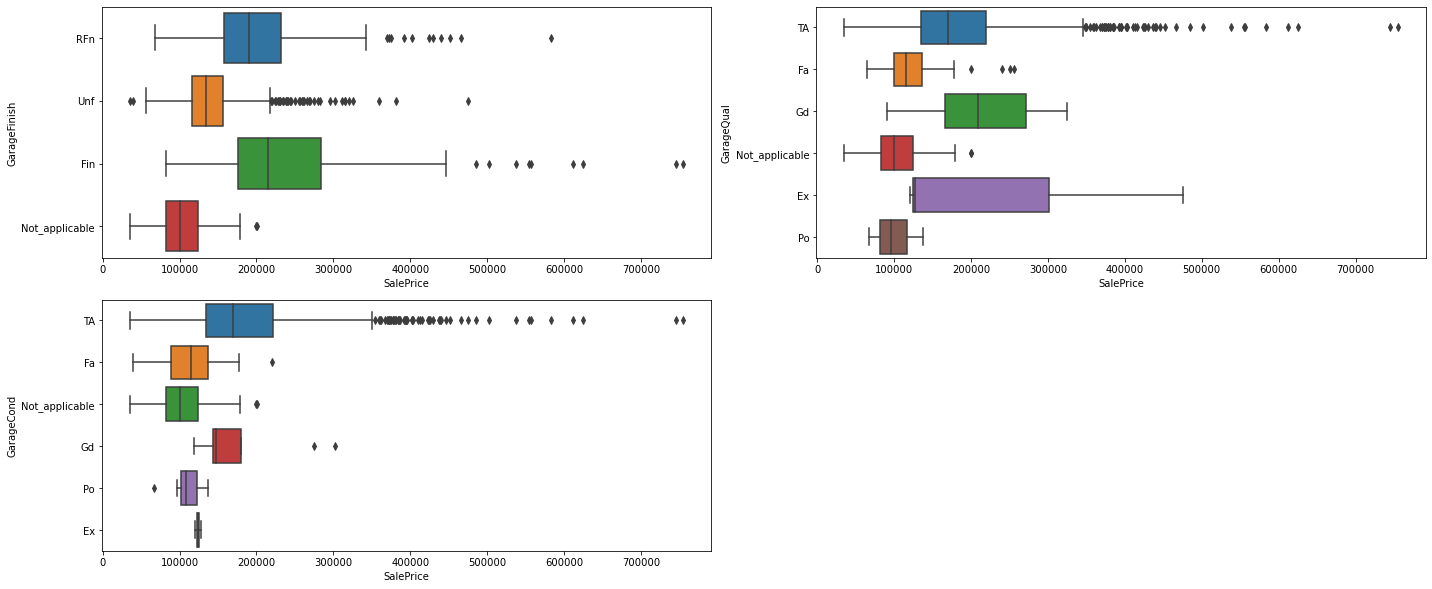

In [44]:
garage_features = ['GarageFinish', 'GarageQual','GarageCond']

generate_boxplot(garage_features)

In [45]:
# SalePrice is highest where garage is finished.
# The range of SalePrice is widest for Typical/Average Garage quality and condition.
# There are very few houses with excellect condition of garage.

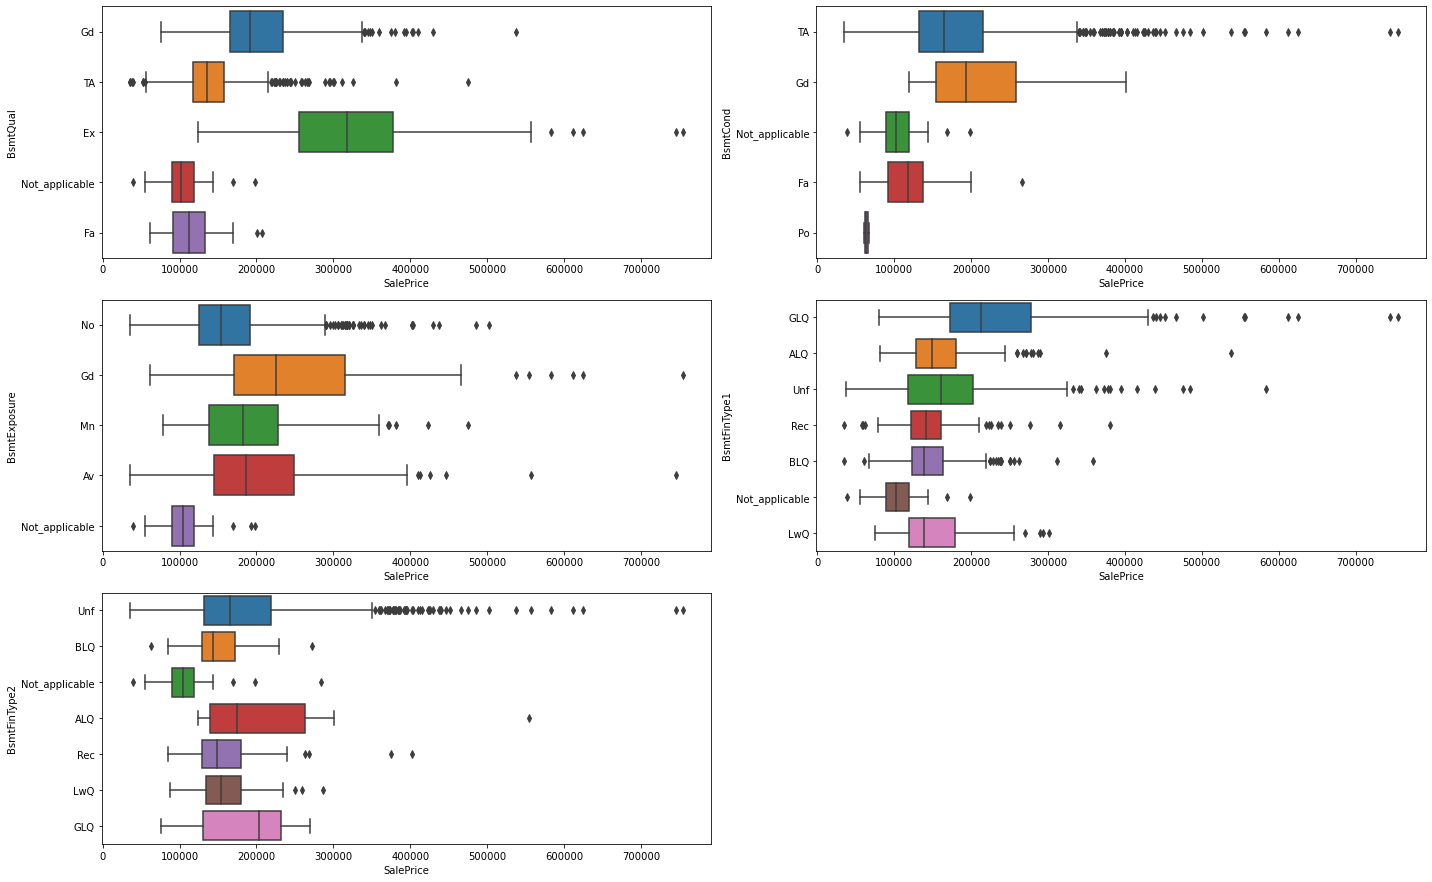

In [46]:
basement_features = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']

generate_boxplot(basement_features)

In [47]:
#Encoding categorical values
h_data['LotShape'] = h_data['LotShape'].map({'IR1':0,'IR2':1,'IR3':2,'Reg':3})
h_data['Utilities'] = h_data['Utilities'].map({'AllPub':3, 'NoSewr':2, 'NoSeWa':1, 'ELO':0})
h_data['LandSlope'] = h_data['LandSlope'].map({'Gtl':0,'Mod':1,'Sev':2})
h_data['HouseStyle'] = h_data['HouseStyle'].map({'1Story':0, '1.5Unf':1, '1.5Fin':2,  '2Story' :3, '2.5Unf':4, '2.5Fin':5, 'SFoyer':6, 'SLvl':7})
h_data['ExterQual'] = h_data['ExterQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_data['ExterCond'] = h_data['ExterCond'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_data['BsmtQual'] = h_data['BsmtQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_data['BsmtCond'] = h_data['BsmtCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_data['BsmtExposure'] = h_data['BsmtExposure'].map({'Not_applicable':0,'No':1,'Mn':2,'Av':3,'Gd':4})
h_data['BsmtFinType1'] =h_data['BsmtFinType1'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
h_data['BsmtFinType2'] = h_data['BsmtFinType2'].map({'Not_applicable':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6})
h_data['HeatingQC'] = h_data['HeatingQC'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_data['CentralAir'] = h_data['CentralAir'].map({'N':0,'Y':1})
h_data['KitchenQual'] = h_data['KitchenQual'].map({'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4})
h_data['GarageFinish'] = h_data['GarageFinish'].map({'Not_applicable':0,'Unf':1,'RFn':2,'Fin':3})
h_data['GarageQual'] = h_data['GarageQual'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_data['GarageCond'] = h_data['GarageCond'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})
h_data['Functional'] = h_data['Functional'].map({'Typ':0, 'Min1':1, 'Min2':2, 'Mod':3, 'Maj1':4, 'Maj2':5, 'Sev':6, 'Sal':7})
h_data['FireplaceQu'] = h_data['FireplaceQu'].map({'Not_applicable':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5})

In [48]:
# Checking the features after encoding

h_data[['LotShape', 'Utilities', 'LandSlope', 'HouseStyle', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual','Functional','FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotShape      1451 non-null   int64
 1   Utilities     1451 non-null   int64
 2   LandSlope     1451 non-null   int64
 3   HouseStyle    1451 non-null   int64
 4   ExterQual     1451 non-null   int64
 5   ExterCond     1451 non-null   int64
 6   BsmtQual      1451 non-null   int64
 7   BsmtCond      1451 non-null   int64
 8   BsmtExposure  1451 non-null   int64
 9   BsmtFinType1  1451 non-null   int64
 10  BsmtFinType2  1451 non-null   int64
 11  HeatingQC     1451 non-null   int64
 12  KitchenQual   1451 non-null   int64
 13  Functional    1451 non-null   int64
 14  FireplaceQu   1451 non-null   int64
 15  GarageFinish  1451 non-null   int64
 16  GarageQual    1451 non-null   int64
 17  GarageCond    1451 non-null   int64
dtypes: int64(18)
memory usage: 247.7 KB


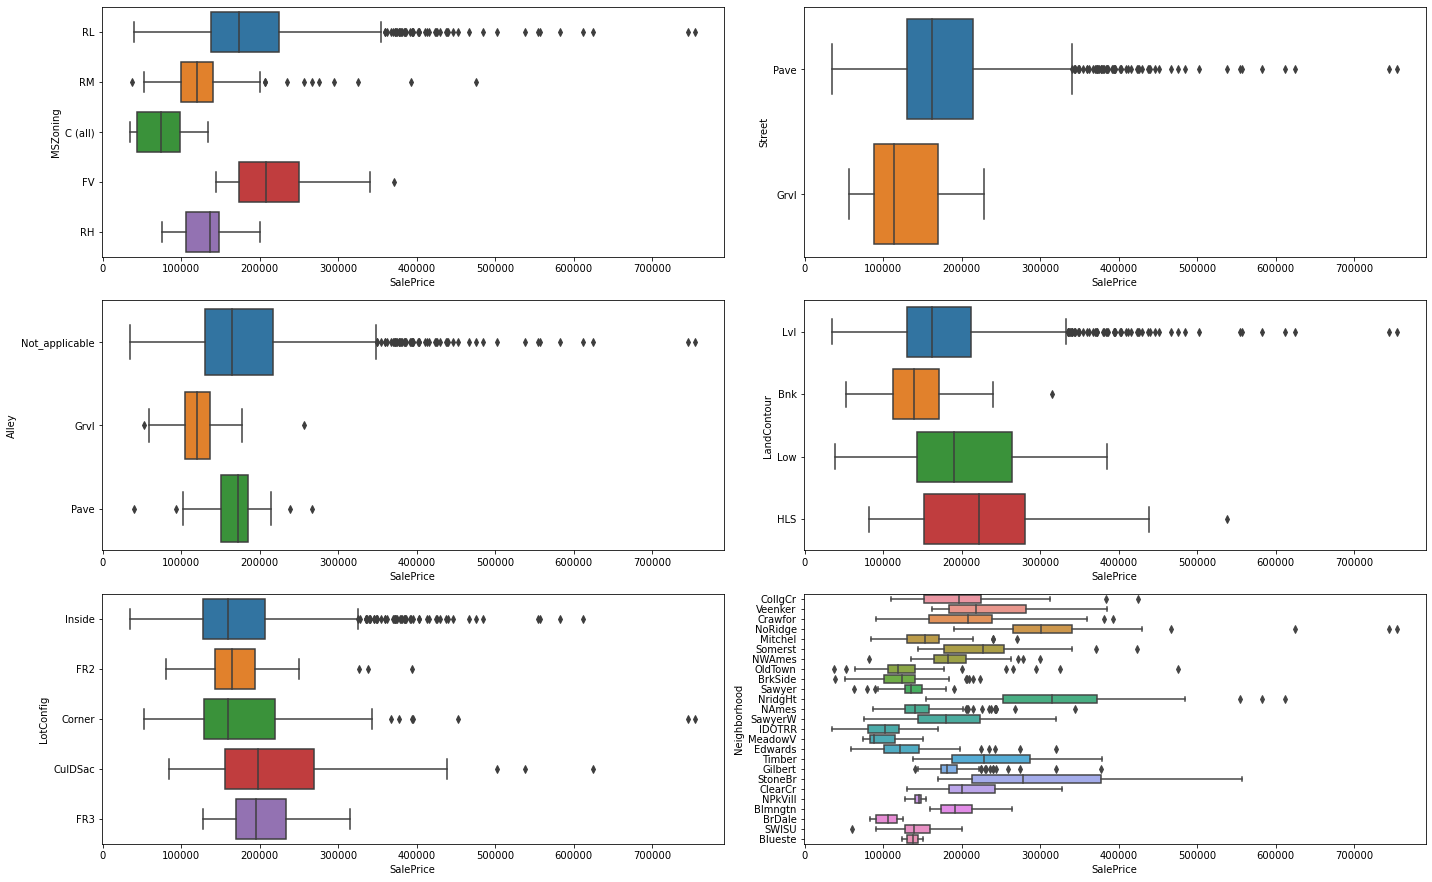

In [49]:
# Analyzing Unordered Featues
unordered_features = ['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood', 'Condition1' , 'Condition2', 
'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature', 'SaleType','SaleCondition']
generate_boxplot(['MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'Neighborhood'])

In [50]:
# Most of the houses do not have alley
# Neighborhood has a lot of labels, using one hot encoding directly would lead to high number of additional columns
# Houses classified as MSZoning = RL or Residential Low density have the highest SalePrice

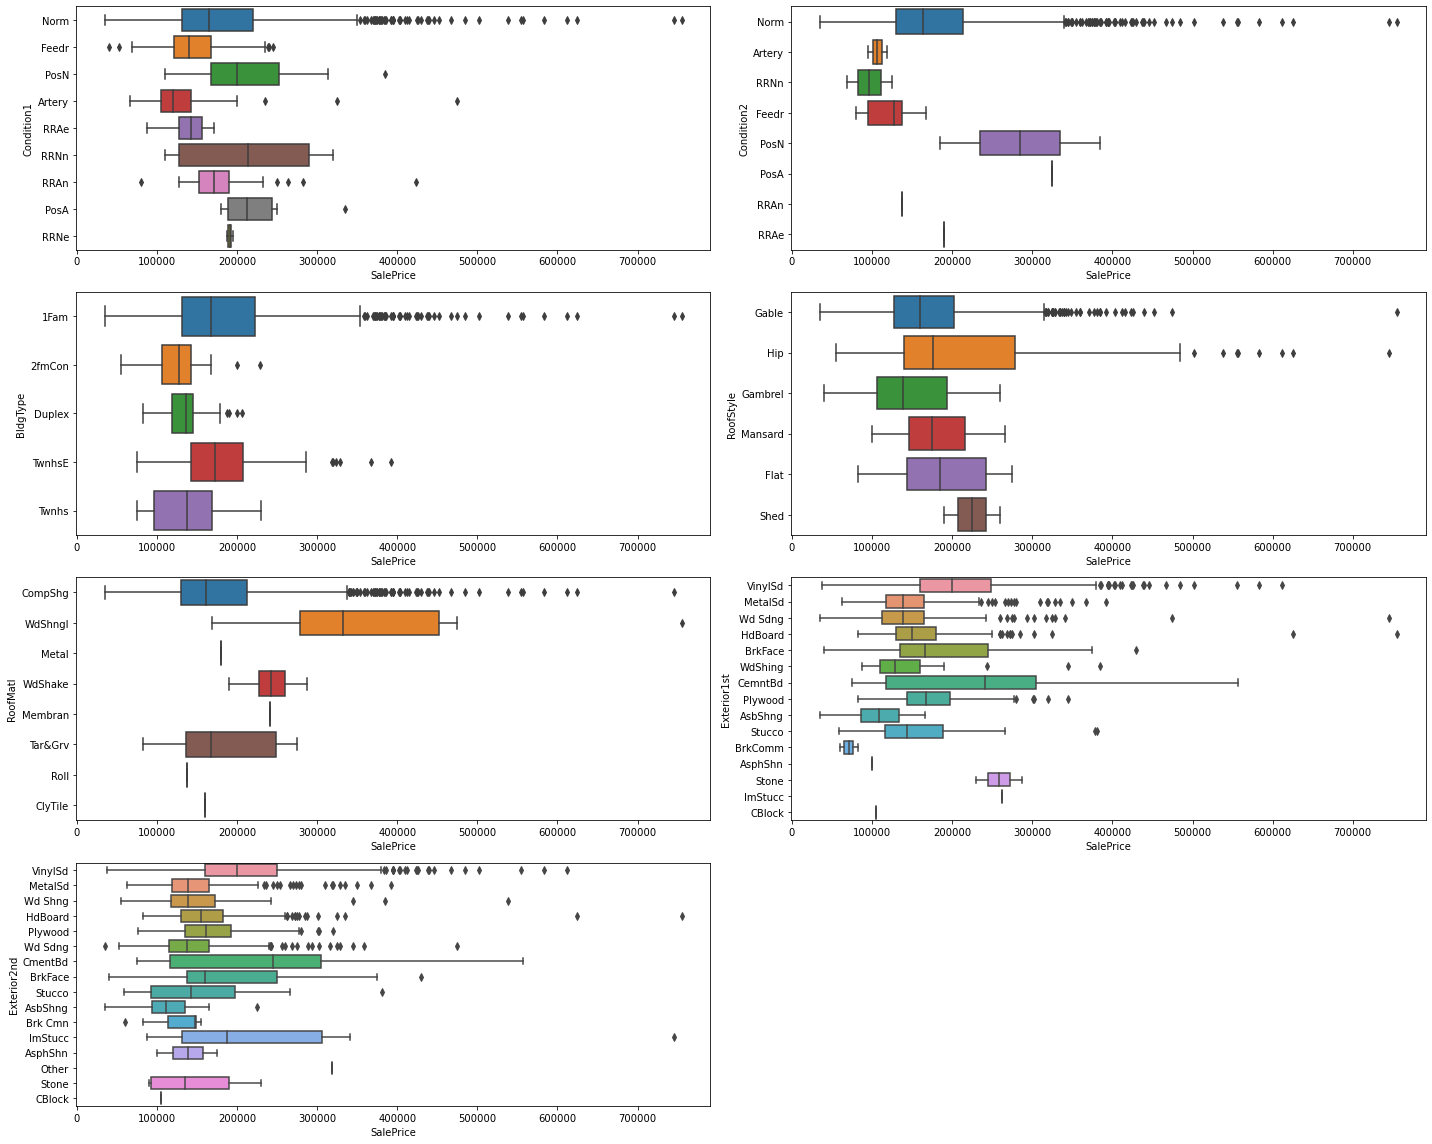

In [51]:
generate_boxplot(['Condition1' , 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd'])

In [52]:
# Normal Condition (Condition1 = Norm and Condition2 = Norm) Houses are likely to have high SalePrice
# Features like 'RoofMatl', 'Exterior1st', 'Exterior2nd' have some labels with very few data, this labels cannot contribute in predicting SalePricee.

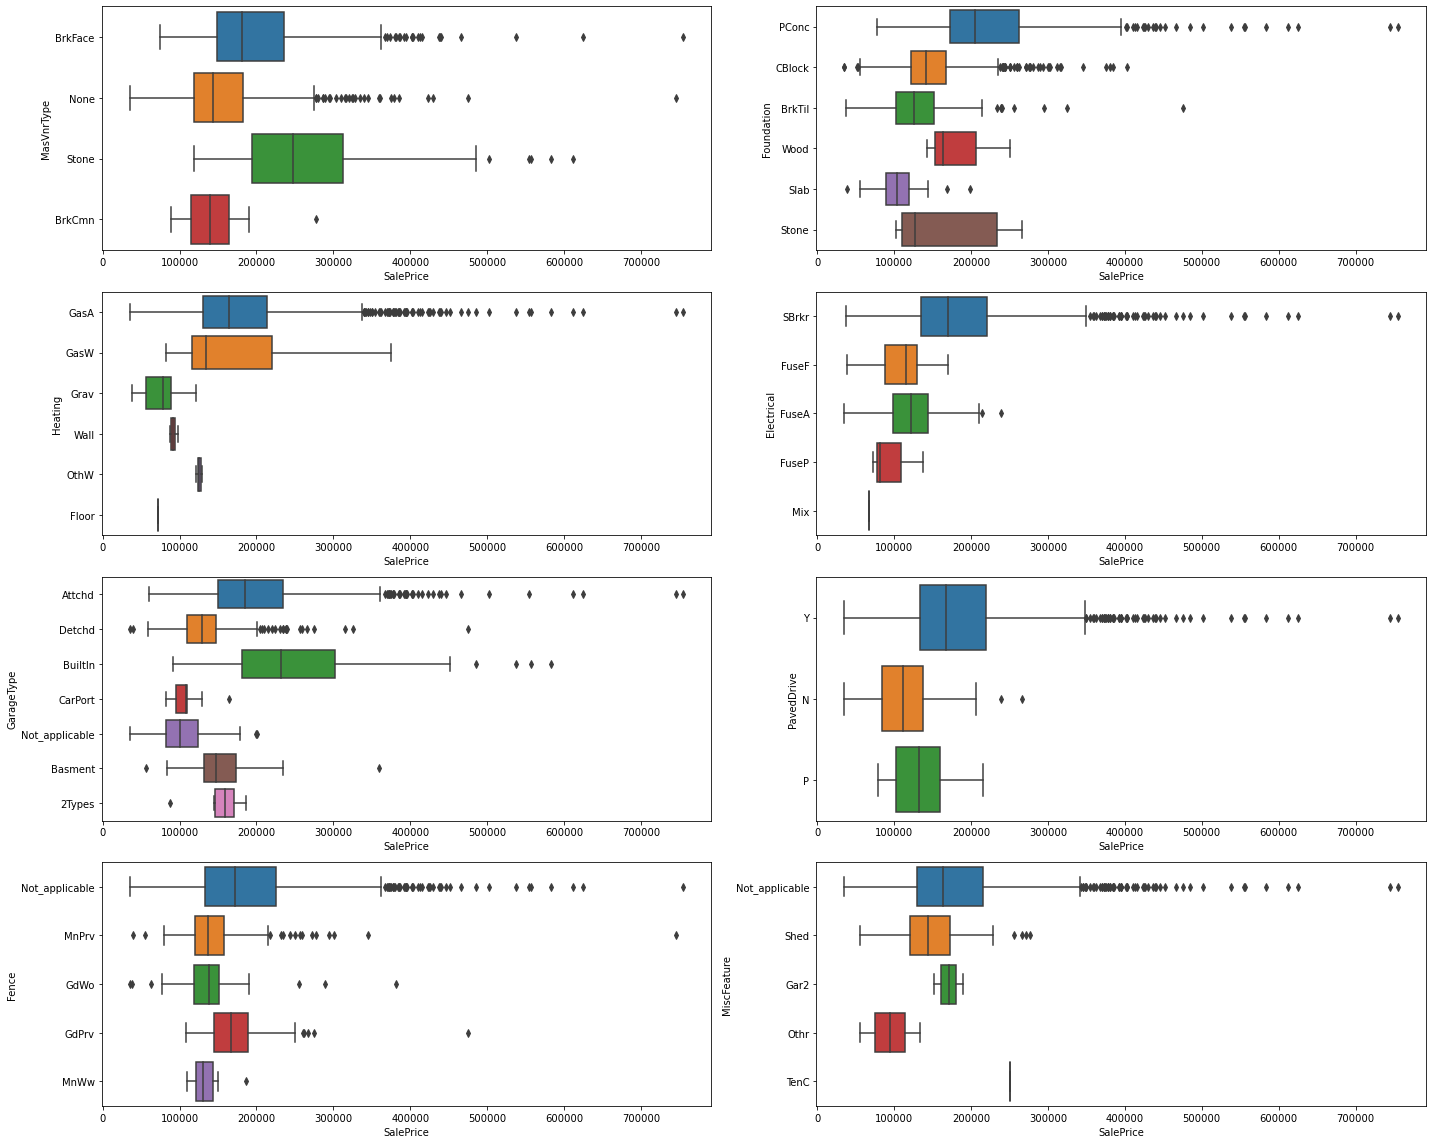

In [53]:
generate_boxplot(['MasVnrType', 'Foundation', 'Heating', 'Electrical', 'GarageType','PavedDrive', 'Fence','MiscFeature'])

In [54]:
# Houses with foundation of poured concrete (Foundation = PConc) and/or Electrical with Standard Circuit Breaker and/or Heating type = GasA have the highest price
# Houses with attached and built-in garage have high SalePrice
# Most of the houses do not have fence (Fence= Not_applicable)

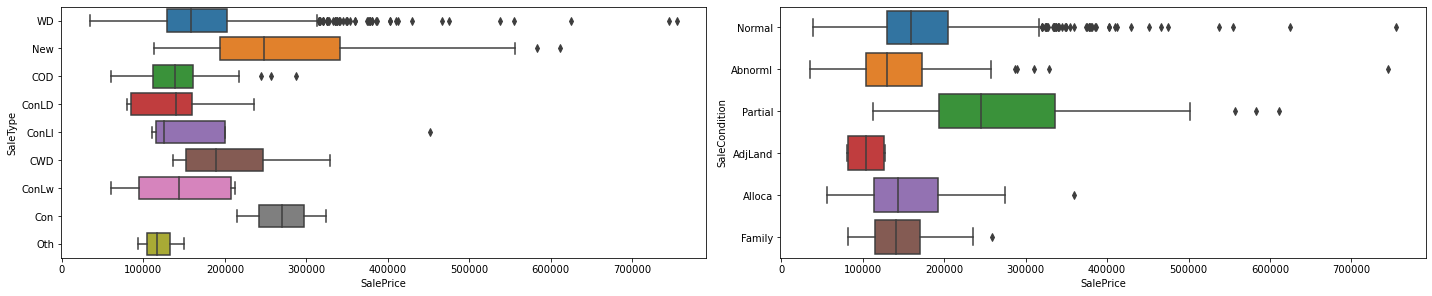

In [55]:
generate_boxplot(['SaleType','SaleCondition'])

In [56]:
# Most of the houses are newly built, houses with warranty deed have high SalePrice
# Sale condition = Normal leads to high SalePrice

In [57]:
#Encoding Categorical Variables
dummy_df = pd.get_dummies(h_data[unordered_features], drop_first=True)

In [58]:
dummy_df.shape

(1451, 144)

In [59]:
# Adding 144 features to the existing dataset will make the model very complex.
# From the above boxplots, for some categorical features only label is dominating over others.
# In dummy_df any label having same value in 95% or more rows will be dropped, as those new features are highly imbalanced.

In [60]:
dummies_to_drop = []
for feat in dummy_df.columns:
    if dummy_df[feat].value_counts()[0]/dummy_df.shape[0] >= 0.95:
        dummies_to_drop.append(feat)
        
print(dummies_to_drop)
print(len(dummies_to_drop))

['MSZoning_FV', 'MSZoning_RH', 'Alley_Pave', 'LandContour_HLS', 'LandContour_Low', 'LotConfig_FR2', 'LotConfig_FR3', 'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NoRidge', 'Neighborhood_SWISU', 'Neighborhood_SawyerW', 'Neighborhood_StoneBr', 'Neighborhood_Timber', 'Neighborhood_Veenker', 'Condition1_PosA', 'Condition1_PosN', 'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe', 'Condition1_RRNn', 'Condition2_Feedr', 'Condition2_PosA', 'Condition2_PosN', 'Condition2_RRAe', 'Condition2_RRAn', 'Condition2_RRNn', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll', 'RoofMatl_Tar&Grv', 'RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',

In [61]:
# Dropping the highly imbalanced dummy variables

dummy_df = dummy_df.drop(dummies_to_drop, axis=1)

print(dummy_df.shape)

(1451, 52)


In [62]:
h_data.shape

(1451, 68)

In [63]:
# Adding the dummy variables to the original dataframe
h_data = pd.concat([h_data,dummy_df],axis=1)

# Dropping the redundant columns
h_data = h_data.drop(unordered_features,axis=1)

In [64]:
h_data.shape

(1451, 97)

## Splitting into Train and Test Data

In [65]:
X = h_data.drop(['SalePrice'], axis=1)
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,Utilities,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,...,GarageType_Detchd,GarageType_Not_applicable,PavedDrive_Y,Fence_MnPrv,Fence_Not_applicable,MiscFeature_Not_applicable,SaleType_New,SaleType_WD,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450.0,3,3,0,3,7,5.0,19,...,0,0,1,0,1,1,0,1,1,0
1,20,80.0,9600.0,3,3,0,0,6,7.5,46,...,0,0,1,0,1,1,0,1,1,0
2,60,68.0,11250.0,0,3,0,3,7,5.0,21,...,0,0,1,0,1,1,0,1,1,0
3,70,60.0,9550.0,0,3,0,3,7,5.0,107,...,1,0,1,0,1,1,0,1,0,0
4,60,84.0,14260.0,0,3,0,3,8,5.0,22,...,0,0,1,0,1,1,0,1,1,0


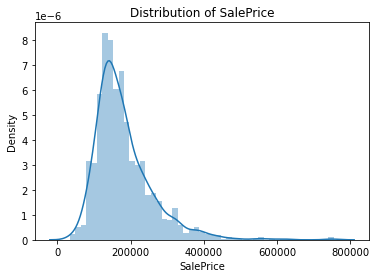

In [66]:
# Checking the distribution of target variable, SalePrice

plt.title('Distribution of SalePrice')
sns.distplot(h_data['SalePrice'])
plt.show()

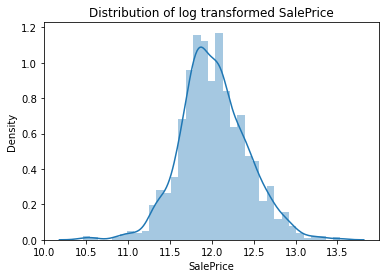

In [67]:
# Since SalePrice is highly right skewed, checking the distribution of transformed SalePrice.
sns.distplot(np.log(h_data['SalePrice']))
plt.title('Distribution of log transformed SalePrice')
plt.show()

In [68]:
# log transformed SalePrice is normally distributed, hence transformed data will be used for model building

y = np.log(h_data['SalePrice'])
print(y)

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1451, dtype: float64


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1160, 96)
(291, 96)
(1160,)
(291,)


In [70]:
X['LotFrontage'].isnull().any()

True

In [71]:
# Imputing missing value of LotFrontage after splitting training and test set to prevent data leakage.

si = SimpleImputer(missing_values=np.nan, strategy='mean')
si.fit(X_train[['LotFrontage']])

SimpleImputer()

In [72]:
X_train[['LotFrontage']] = si.transform(X_train[['LotFrontage']])

In [73]:
X_test[['LotFrontage']] = si.transform(X_test[['LotFrontage']])

# Feature Scaling

In [74]:
X_train.values

array([[6.000000e+01, 8.000000e+01, 1.040000e+04, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [2.000000e+01, 6.000000e+01, 6.600000e+03, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [1.450000e+02, 3.300000e+01, 4.456000e+03, ..., 0.000000e+00,
        0.000000e+00, 1.000000e+00],
       ...,
       [1.200000e+02, 6.904341e+01, 5.271000e+03, ..., 1.000000e+00,
        0.000000e+00, 0.000000e+00],
       [5.000000e+01, 6.000000e+01, 1.044000e+04, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00],
       [6.000000e+01, 7.000000e+01, 8.400000e+03, ..., 1.000000e+00,
        1.000000e+00, 0.000000e+00]])

In [75]:
ss = StandardScaler()
ss.fit(X_train)

StandardScaler()

In [76]:
X_tr_scaled = pd.DataFrame(data=ss.transform(X_train), columns=X_train.columns)
X_te_scaled = pd.DataFrame(data=ss.transform(X_test), columns=X_test.columns)

In [77]:
# Checking the features after 

print(X_tr_scaled) # train data
print(X_te_scaled) # test data

      MSSubClass  LotFrontage   LotArea  LotShape  Utilities  LandSlope  \
0       0.116468     0.615582  0.215020  0.751335   0.029374  -0.221915   
1      -0.946286    -0.508092 -0.845097  0.751335   0.029374  -0.221915   
2       2.374819    -2.025052 -1.443226  0.751335   0.029374  -0.221915   
3      -0.946286     0.166112  0.145834  0.751335   0.029374  -0.221915   
4       0.382156    -0.789011 -0.308064  0.751335   0.029374  -0.221915   
...          ...          ...       ...       ...        ...        ...   
1155   -0.946286     1.233603  0.737826 -1.379591   0.029374  -0.221915   
1156   -0.946286    -0.058623  2.244169 -1.379591   0.029374  -0.221915   
1157    1.710598     0.000000 -1.215859 -1.379591   0.029374   3.455532   
1158   -0.149221    -0.508092  0.226179  0.751335   0.029374  -0.221915   
1159    0.116468     0.053745 -0.342936  0.751335   0.029374  -0.221915   

      HouseStyle  OverallQual  OverallCond  YearBuilt  ...  GarageType_Detchd  \
0       0.680042  

# Initial Feature Selection with RFE

In [78]:
# Given the number of features = n, the functions prints and returns top n features selected by RFE

def top_n_features(n):
    top_n_cols = []
    
    linear_m = LinearRegression()
    linear_m.fit(X_tr_scaled, y_train)
    rfe = RFE(linear_m, n)
    rfe = rfe.fit(X_tr_scaled, y_train)
    
    print("Top %d features : " %n)
    rfe_ranking = list(zip(X_tr_scaled.columns,rfe.support_,rfe.ranking_))
    
    for i in rfe_ranking:
        if i[1]:
            top_n_cols.append(i[0])
    print(top_n_cols)
    return top_n_cols

In [79]:
# Checking top 45, 50 and 55 features
top_45 = top_n_features(45)
top_50 = top_n_features(50)
top_55 = top_n_features(55)

Top 45 features : 
['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageArea', 'GarageQual', 'MSZoning_RL', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_Somerst', 'Condition1_Norm', 'Condition2_Norm', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Plywood', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Plywood', 'Exterior2nd_Wd Sdng', 'Foundation_PConc', 'GarageType_Attchd', 'GarageType_Detchd', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleType_New', 'SaleCondition_Normal', 'SaleCondition_Partial']
Top 50 features : 
['LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfS

In [80]:
# Given the training data and list of features, this will provide the statistical summary of the model
# This will be used to check adjusted R-square value for top 45, 50 and 55 features

def build_regressor(X_train,y_train,cols):
    X_train_ols = sm.add_constant(X_train[cols])
    lin_reg = sm.OLS(y_train.values.reshape(-1,1), X_train_ols).fit()
    print(lin_reg.summary()) 

In [81]:
build_regressor(X_tr_scaled,y_train,top_45)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.911
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     253.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:28:32   Log-Likelihood:                 822.26
No. Observations:                1160   AIC:                            -1553.
Df Residuals:                    1114   BIC:                            -1320.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [82]:
build_regressor(X_tr_scaled,y_train,top_50)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     230.1
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:28:32   Log-Likelihood:                 828.43
No. Observations:                1160   AIC:                            -1555.
Df Residuals:                    1109   BIC:                            -1297.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [83]:
build_regressor(X_tr_scaled,y_train,top_55)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.913
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     217.8
Date:                Wed, 09 Feb 2022   Prob (F-statistic):               0.00
Time:                        22:28:32   Log-Likelihood:                 831.59
No. Observations:                1160   AIC:                            -1555.
Df Residuals:                    1106   BIC:                            -1282.
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [84]:
# By inspecting adjusted R-square value of linear regression model with top 45, top 50 and top 55 features, top 50 features seem to be optimum as models with 50 and 55 features have the same adjusted R-squared value on the training data.

In [85]:
X_train_rfe = X_tr_scaled[top_50]
X_test_rfe = X_te_scaled[top_50]

In [86]:
# Reusable Code Block for Cross-validation, Model Building and Model Evaluation

def build_model(X_train, y_train, X_test, params, model='Ridge'):
  if model == 'Ridge':
    estimator_model = Ridge()
  else:
    estimator_model = Lasso()
  model_cv = GridSearchCV(estimator = estimator_model, 
                          param_grid = params, 
                          scoring= 'neg_mean_absolute_error', 
                          cv = 5, 
                          return_train_score=True,
                          verbose = 1)            
  model_cv.fit(X_train, y_train)
  alpha = model_cv.best_params_["alpha"]
  print("Optimum alpha for %s is %f" %(model, alpha))
  final_model = model_cv.best_estimator_

  final_model.fit(X_train, y_train)
  y_train_pred = final_model.predict(X_train)
  y_test_pred = final_model.predict(X_test)
 
  # Model Evaluation
  print(model," Regression with ",alpha)
  print("===================================")
  print('R2 score (train) : ',r2_score(y_train,y_train_pred))
  print('R2 score (test) : ',r2_score(y_test,y_test_pred))
  print('RMSE (train) : ', np.sqrt(mean_squared_error(y_train, y_train_pred)))
  print('RMSE (test) : ', np.sqrt(mean_squared_error(y_test, y_test_pred)))

  return final_model, y_test_pred

# Ridge Regression

In [87]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='Ridge')

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Optimum alpha for Ridge is 20.000000
Ridge  Regression with  20
R2 score (train) :  0.9116259016383316
R2 score (test) :  0.8936374683989801
RMSE (train) :  0.11877570767888192
RMSE (test) :  0.12996321222832757


In [88]:
# Ridge Regression model was able to achieve R2 score of 0.89 on test data i.e. 89% of the variance in test data can be explained by the model.

# Lasso Regression

In [89]:
params = {'alpha': [0.000001, 0.00001,0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 500, 1000, 10000]}

lasso_final_model, y_test_predicted = build_model(X_train_rfe, y_train, X_test_rfe, params, model='lasso')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Optimum alpha for lasso is 0.001000
lasso  Regression with  0.001
R2 score (train) :  0.9108761007744381
R2 score (test) :  0.8955173879889222
RMSE (train) :  0.11927851351167258
RMSE (test) :  0.1288095653521245


In [90]:
# R2 score and RMSE terms for Lasso regression has been observed to be similar to that of the Ridge regression

In [91]:
model_coefficients = pd.DataFrame(index=X_test_rfe.columns)
model_coefficients.rows = X_test_rfe.columns

model_coefficients['Ridge (alpha=9.0)'] = ridge_final_model.coef_
model_coefficients['Lasso (alpha=0.0001)'] = lasso_final_model.coef_
pd.set_option('display.max_rows', None)
model_coefficients

,Ridge (alpha=9.0),Lasso (alpha=0.0001)
LotArea,0.035802,0.034733
LandSlope,0.009488,0.008518
OverallQual,0.086841,0.089806
OverallCond,0.041955,0.042933
YearBuilt,-0.027269,-0.030066
YearRemodAdd,-0.016376,-0.015606
BsmtExposure,0.012407,0.011483
BsmtFinSF1,0.051158,0.047773
BsmtFinType2,0.009549,0.008248
BsmtUnfSF,0.023044,0.017553


In [92]:
# Converting the predictions to its original scale (anti log)

test_prediction = np.round(np.exp(y_test_predicted)).astype(int)
print(test_prediction[:5])

[134779 237279 165064 124998 175006]


# Final Model

Lasso Regression produced slightly higher R2 score and lesser RMSE on test data than Ridge Regression. Choosing Lasso as the final model.

In [93]:
# 50 features ordered by feature importance in Lasso Regression

model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False)

,Lasso (alpha=0.0001)
1stFlrSF,0.121875
2ndFlrSF,0.118028
OverallQual,0.089806
BsmtFinSF1,0.047773
OverallCond,0.042933
LotArea,0.034733
SaleCondition_Normal,0.027449
SaleType_New,0.025787
MSZoning_RL,0.024801
Neighborhood_Somerst,0.022976


In [94]:
model_coefficients[['Lasso (alpha=0.0001)']].sort_values(by='Lasso (alpha=0.0001)', ascending=False).index[:10]

Index(['1stFlrSF', '2ndFlrSF', 'OverallQual', 'BsmtFinSF1', 'OverallCond',
       'LotArea', 'SaleCondition_Normal', 'SaleType_New', 'MSZoning_RL',
       'Neighborhood_Somerst'],
      dtype='object')

# Summary

Housing data is read and analyzed dividing the features into numerical and categorical types.
SalePrice is the target variable.

Features- missing data handling, outlier detection, data cleaning are done. SalePrice is observed for change in individual features.

New features are extracted, redundant features dropped and categorical features are encoded accordingly.
Then the data in split into train and test data and feature scaling is performed.

Target variable SalePrice is right skewed. Natural log of the same is Normal distributed, hence for model building, natural log of SalePrice is considered.

Creating dummy variables increased the number of features greatly, highly imbalanced columns are dropped.

Top 50 features are selected through RFE and adjusted R-square. 50 features : 
['MSSubClass', 'LotArea', 'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtQual', 'BsmtExposure', 'BsmtFinSF1', 'BsmtUnfSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'Functional', 'Fireplaces', 'GarageFinish', 'GarageArea', 'GarageQual', 'OpenPorchSF', 'MSZoning_RL', 'Street_Pave', 'LotConfig_CulDSac', 'Neighborhood_Edwards', 'Neighborhood_NAmes', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt', 'Neighborhood_Somerst', 'Condition1_Feedr', 'Condition1_Norm', 'Condition2_Norm', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Hip', 'Exterior1st_HdBoard', 'Exterior1st_Wd Sdng', 'Exterior2nd_HdBoard', 'Exterior2nd_Wd Sdng', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'Foundation_PConc', 'Heating_GasA', 'GarageType_Not_applicable', 'PavedDrive_Y', 'SaleCondition_Normal', 'SaleCondition_Partial']

Ridge and Lasso Regression Model are built with optimum alpha calculated in GridSearchCV method. Optimum alpha = 9.0 for ridge and 0.0001 for lasso model.

Model evaluation is done with R2 score and Root Mean Square Error.

Lasso Regression is chosen as final model for having slightly better R-square value on test data.

Out of 50 features in the final model, top 10 features in order of descending importance are ['1stFlrSF', '2ndFlrSF', 'OverallQual', 'OverallCond', 'SaleCondition_Partial', 'LotArea', 'BsmtFinSF1','SaleCondition_Normal', 'MSZoning_RL', 'Neighborhood_Somerst']

Model coefficients are listed in a table along with the corresponding features , for example natural log of SalePrice will change by 0.124911 with unit change in the feature '1stFlrSF' when all the features remain constant. Negative sign in the coefficient signifies negative correlation between the predictor and target variable.

Predicted value of SalePrice is tranformed into its original scale by performing antilog.